In [ ]:
# Wine quality
# https://www.kaggle.com/shelvigarg/wine-quality-dataset

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import GridSearchCV

# Part 0: Load data

In [2]:
# Load dataset
data = pd.read_csv("winequalityN.csv")
data

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
# Check whether there are missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Replace using mean
data.fillna(data.mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


/tmp/ipykernel_3811/4051398138.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


In [5]:
# Variable "type" is categorical
data["type"].unique()

array(['white', 'red'], dtype=object)

In [6]:
# Let's change it into numeric
data["type"] = data["type"].astype('category').cat.codes
data["type"].unique()

array([1, 0], dtype=int8)

# Part 1: Regression

In [7]:
# Use all variables, but "quality", as independet variables. And
# use "quality" as target variable.
X = data[["type", "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
          "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH",
          "sulphates", "alcohol"]].to_numpy()
Y = data["quality"].to_numpy()

print(X.shape)
print(Y.shape)

(6497, 12)
(6497,)


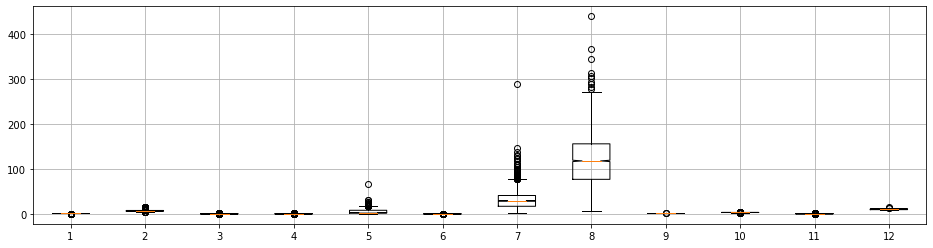

In [8]:
# Look at the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.grid()
plt.show()

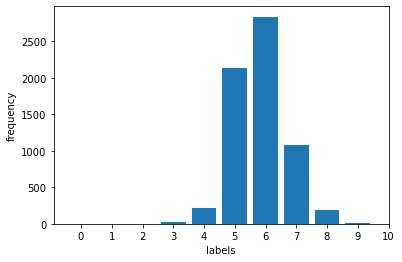

In [9]:
# Look at the target variable
plt.hist(Y, bins=range(max(Y)+2), align='left', rwidth=0.8)
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

In [10]:
# Train-val-test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f"{len(x_train)} training samples")
print(f"{len(x_val)} validation samples")
print(f"{len(x_test)} test samples")

4677 training samples
1170 validation samples
650 test samples


In [11]:
# Create a linear regression model
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [12]:
# Evaluate on training and validation sets
print(f"Classification score on the training set: {linreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {linreg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.296
Classification score on the validation set: 0.294


In [13]:
# Print coefficients (weights)
linreg.coef_

array([-3.62194654e-01,  9.36704658e-02, -1.48599714e+00, -9.78058755e-02,
        6.30904868e-02, -1.03714356e+00,  3.63252484e-03, -1.03380264e-03,
       -1.05870628e+02,  5.04066299e-01,  8.08386270e-01,  2.21593420e-01])

In [15]:
# See some predictions
y_test_hat = linreg.predict(x_test)

print(["{0:0.0f}".format(i) for i in y_test[:15]])
print(["{0:0.0f}".format(i) for i in y_test_hat[:15]])

['6', '5', '5', '6', '6', '6', '5', '5', '5', '6', '6', '6', '7', '5', '5']
['5', '6', '5', '5', '6', '6', '5', '6', '5', '6', '6', '6', '6', '5', '5']


In [21]:
# Create a GridSearch object for Lasso regression
parameters = {'alpha': np.logspace(-9, 2, 12)}

gs = GridSearchCV(Lasso(), parameters)
gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.288
Best params: {'alpha': 1e-06}


In [22]:
# Get best model and see its coefficients
lassoreg = gs.best_estimator_
lassoreg.coef_

array([-3.57125591e-01,  9.17084233e-02, -1.48743471e+00, -9.86137564e-02,
        6.21855922e-02, -1.04094978e+00,  3.64806092e-03, -1.04184744e-03,
       -1.03514177e+02,  4.95037317e-01,  8.05086846e-01,  2.24143232e-01])

In [23]:
# Evaluate on training and validation sets
print(f"Classification score on the training set: {lassoreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {lassoreg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.296
Classification score on the validation set: 0.294


In [ ]:
# And now, do it for Ridge and Elastic regression

In [25]:
# Create a GridSearch object for Ridge regression
parameters = {'alpha': np.logspace(-9, 2, 12)}

gs = GridSearchCV(Ridge(), parameters)
gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.288
Best params: {'alpha': 0.0001}


In [27]:
# Evaluate on training and validation sets
ridgereg = gs.best_estimator_

print(f"Classification score on the training set: {ridgereg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {ridgereg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.296
Classification score on the validation set: 0.294


In [37]:
from warnings import filterwarnings
filterwarnings('ignore')

In [38]:
# Create a GridSearch object for Elastic regression
parameters = {'alpha': np.logspace(-9, 2, 12), 'l1_ratio': np.arange(0., 1.1, 0.1)}

gs = GridSearchCV(ElasticNet(), parameters)
gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.288
Best params: {'alpha': 1e-07, 'l1_ratio': 0.4}


In [39]:
# Evaluate on training and validation sets
elasticreg = gs.best_estimator_

print(f"Classification score on the training set: {elasticreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {elasticreg.score(x_val, y_val):.3f}")

Classification score on the training set: 0.296
Classification score on the validation set: 0.294


In [ ]:
# Keep the best model among linear, lasso, ridge, and elastic regression, and evaluate it on the test set

In [40]:
# The best model is the simplest one: linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

In [41]:
# Evaluate on training and validation sets
print(f"Classification score on the training set: {linreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {linreg.score(x_val, y_val):.3f}")
print(f"Classification score on the validation set: {linreg.score(x_test, y_test):.3f}")

Classification score on the training set: 0.296
Classification score on the validation set: 0.294
Classification score on the validation set: 0.294


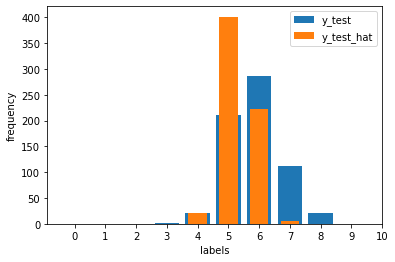

In [42]:
# Plot y and y_hat from the test set
y_test_hat = linreg.predict(x_test)

plt.hist(y_test, bins=range(max(Y)+2), align='left', rwidth=0.8, label='y_test')
plt.hist(y_test_hat, bins=range(max(Y)+2), align='left', rwidth=0.6, label='y_test_hat')
plt.legend()
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

# Part 2: Classification

In [43]:
# Use all variables, but "type", as independet variables. And
# use "type" as target variable.
X = data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
          "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH",
          "sulphates", "alcohol", "quality"]].to_numpy()
Y = data["type"].to_numpy()

print(X.shape)
print(Y.shape)

(6497, 12)
(6497,)


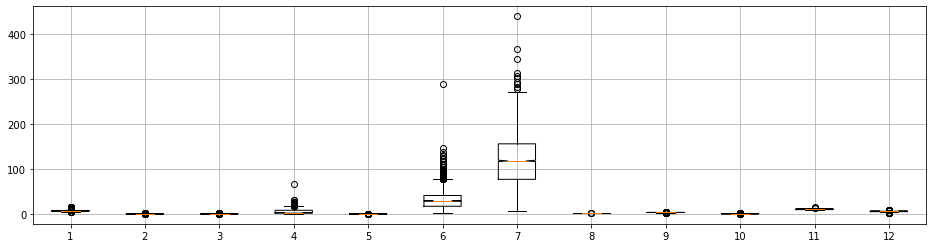

In [44]:
# Look at the independent variables
plt.figure(figsize=(16, 4))
plt.boxplot(X, notch=True)
plt.grid()
plt.show()

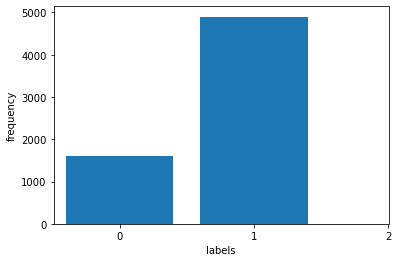

In [45]:
# Look at the target variable
plt.hist(Y, bins=range(max(Y)+2), align='left', rwidth=0.8)
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()

In [46]:
# Train-val-test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

print(f"{len(x_train)} training samples")
print(f"{len(x_val)} validation samples")
print(f"{len(x_test)} test samples")

4677 training samples
1170 validation samples
650 test samples


In [47]:
# See the documentation for logistic regression, and find a good classification model.
# Hint: explore the hyper-parameters "penalty" and "C".
# Look at the hyper-parameter "class_weight". Can it help somehow?
# Report your results on the training, validation, and test sets

In [59]:
# Create a GridSearch object for Logistic regression
parameters = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-10, 4, 12),
              'l1_ratio': np.arange(0., 1.1, 0.1),
              'class_weight': ['balanced', 'None']
             }

gs = GridSearchCV(LogisticRegression(), parameters)
gs.fit(x_train, y_train)

print(f"Best score: {gs.best_score_:.3f}")
print(f"Best params: {gs.best_params_}")

Best score: 0.979
Best params: {'C': 10000.0, 'class_weight': 'None', 'l1_ratio': 0.0, 'penalty': 'l2'}


In [60]:
# Evaluate on training and validation sets
logisticreg = gs.best_estimator_

print(f"Classification score on the training set: {logisticreg.score(x_train, y_train):.3f}")
print(f"Classification score on the validation set: {logisticreg.score(x_val, y_val):.3f}")
print(f"Classification score on the validation set: {logisticreg.score(x_test, y_test):.3f}")

Classification score on the training set: 0.981
Classification score on the validation set: 0.987
Classification score on the validation set: 0.974


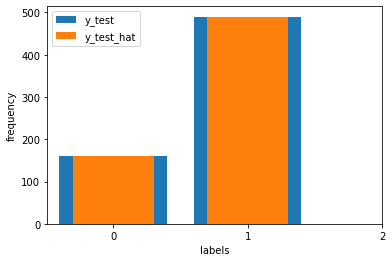

In [61]:
# Plot y and y_hat from the test set
y_test_hat = logisticreg.predict(x_test)

plt.hist(y_test, bins=range(max(Y)+2), align='left', rwidth=0.8, label='y_test')
plt.hist(y_test_hat, bins=range(max(Y)+2), align='left', rwidth=0.6, label='y_test_hat')
plt.legend()
plt.xticks(range(max(Y)+2), labels=range(max(Y)+2))
plt.xlabel('labels')
plt.ylabel('frequency')
plt.show()